In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import warnings

warnings.filterwarnings('ignore')

In [39]:

import pandas as pd
import numpy as np
#from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
from matplotlib.gridspec import GridSpec
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from warnings import filterwarnings
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, silhouette_samples
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
#from factor_analyzer import FactorAnalyzer
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import ElasticNet
from itertools import combinations
from kmodes.kprototypes import KPrototypes
from collections import Counter
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
### so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.cluster import DBSCAN
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [40]:
df = pd.read_csv("liver_cirrhosis.csv")

In [41]:
# Column descriptions:
# N_Days: Number of days between registration and the earlier of death, transplantation, or study analysis time in 1986
# Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)
# Drug: type of drug D-penicillamine or placebo
# Age: age in days
# Sex: M (male) or F (female)
# Ascites: presence of ascites N (No) or Y (Yes)
# Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)
# Spiders: presence of spiders N (No) or Y (Yes)
# Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)
# Bilirubin: serum bilirubin in [mg/dl]
# Cholesterol: serum cholesterol in [mg/dl]
# Albumin: albumin in [gm/dl]
# Copper: urine copper in [ug/day]
# Alk_Phos: alkaline phosphatase in [U/liter]
# SGOT: SGOT in [U/ml]
# Tryglicerides: triglicerides in [mg/dl]
# Platelets: platelets per cubic [ml/1000]
# Prothrombin: prothrombin time in seconds [s]
# Stage: histologic stage of disease ( 1, 2, or 3 )

In [42]:
df.head()

N_Days Status     Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
0    2221      C  Placebo  18499   F       N            Y       N     N   
1    1230      C  Placebo  19724   M       Y            N       Y     N   
2    4184      C  Placebo  11839   F       N            N       N     N   
3    2090      D  Placebo  16467   F       N            N       N     N   
4    2105      D  Placebo  21699   F       N            Y       N     N   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0        0.5        149.0     4.04   227.0     598.0   52.70           57.0   
1        0.5        219.0     3.93    22.0     663.0   45.00           75.0   
2        0.5        320.0     3.54    51.0    1243.0  122.45           80.0   
3        0.7        255.0     3.74    23.0    1024.0   77.50           58.0   
4        1.9        486.0     3.54    74.0    1052.0  108.50          109.0   

   Platelets  Prothrombin  Stage  
0      256.0          9.9      1  
1      220.0         10.8      2  
2      225.0         10.0      2  
3      151.0         10.2      2  
4      151.0         11.5      1

In [43]:
df.columns

Index(['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

In [44]:
df['Edema'].value_counts()

Edema
N    20220
S     3698
Y     1082
Name: count, dtype: int64

In [45]:
# Missing Values
df.isnull().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [46]:
df.dtypes

N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage              int64
dtype: object

In [47]:
df.shape

(25000, 19)

In [48]:
# Check for duplicate rows in the dataframe
#duplicate_rows = df.duplicated()

# Count the number of duplicate rows
#num_duplicates = duplicate_rows.sum()
#print(f"Number of duplicate rows: {num_duplicates}")

In [49]:
# Remove duplicate rows from the dataframe
#df = df.drop_duplicates()

# Verify the number of rows after removing duplicates
#print(f"Number of rows after removing duplicates: {num_rows_after_removal}")

In [50]:
df.describe()

N_Days           Age     Bilirubin   Cholesterol       Albumin  \
count  25000.000000  25000.000000  25000.000000  25000.000000  25000.000000   
mean    1887.117040  18495.877080      3.402644    372.331471      3.486578   
std     1091.690918   3737.596616      4.707491    193.668452      0.380488   
min       41.000000   9598.000000      0.300000    120.000000      1.960000   
25%     1080.000000  15694.000000      0.800000    275.000000      3.290000   
50%     1680.000000  18499.000000      1.300000    369.510563      3.510000   
75%     2576.000000  20955.000000      3.400000    369.510563      3.750000   
max     4795.000000  28650.000000     28.000000   1775.000000      4.640000   

             Copper      Alk_Phos          SGOT  Tryglicerides     Platelets  \
count  25000.000000  25000.000000  25000.000000   25000.000000  25000.000000   
mean     100.184663   1995.675597    123.166345     123.822548    256.007337   
std       73.184840   1798.885660     47.747616      52.786350     98.679006   
min        4.000000    289.000000     26.350000      33.000000     62.000000   
25%       52.000000   1032.000000     92.000000      92.000000    189.000000   
50%       97.648387   1828.000000    122.556346     124.702128    251.000000   
75%      107.000000   1982.655769    134.850000     127.000000    311.000000   
max      588.000000  13862.400000    457.250000     598.000000    721.000000   

        Prothrombin        Stage  
count  25000.000000  25000.00000  
mean      10.734549      2.00116  
std        0.904436      0.81387  
min        9.000000      1.00000  
25%       10.000000      1.00000  
50%       10.600000      2.00000  
75%       11.100000      3.00000  
max       18.000000      3.00000

In [51]:
df.nunique()

N_Days           549
Status             3
Drug               2
Age              510
Sex                2
Ascites            2
Hepatomegaly       2
Spiders            2
Edema              3
Bilirubin        113
Cholesterol      220
Albumin          179
Copper           197
Alk_Phos         336
SGOT             240
Tryglicerides    157
Platelets        295
Prothrombin       51
Stage              3
dtype: int64

In [52]:
df["Stage"] = df["Stage"].map({1:0, 2:1, 3:2})

In [53]:
X= df.drop(columns=['Stage'])
Y = df['Stage']
x_train , x_test, y_train , y_test = train_test_split(X,Y,test_size=0.2,random_state=0)




In [54]:
numericals = ['N_Days', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Age']
print(numericals)

['N_Days', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Age']


In [55]:
# Standardize the features
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#x_train[numericals] = scaler.fit_transform(x_train[numericals])
#x_test[numericals] = scaler.transform(x_test[numericals])


In [56]:
categoricals = ["Status", "Drug", "Sex", "Ascites", "Hepatomegaly",
               "Spiders", "Edema"]

In [57]:
df[categoricals]

Status             Drug Sex Ascites Hepatomegaly Spiders Edema
0          C          Placebo   F       N            Y       N     N
1          C          Placebo   M       Y            N       Y     N
2          C          Placebo   F       N            N       N     N
3          D          Placebo   F       N            N       N     N
4          D          Placebo   F       N            Y       N     N
...      ...              ...  ..     ...          ...     ...   ...
24995      D  D-penicillamine   F       N            N       N     N
24996      D  D-penicillamine   F       N            N       N     N
24997      D  D-penicillamine   F       N            Y       Y     Y
24998      C  D-penicillamine   F       N            Y       N     N
24999      C  D-penicillamine   F       N            Y       N     N

[25000 rows x 7 columns]

In [58]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

categoricals = ["Status", "Drug", "Sex", "Ascites", "Hepatomegaly", "Spiders", "Edema"]

# OneHotEncoder instance
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the data
encoded_data = encoder.fit_transform(df[categoricals])

# Convert the encoded data to a DataFrame
df_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categoricals))

# Combine the encoded columns with the original dataframe
df = pd.concat([df, df_encoded], axis=1).drop(columns=categoricals)

print(df)


       N_Days    Age  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  \
0        2221  18499        0.5   149.000000     4.04   227.0     598.0   
1        1230  19724        0.5   219.000000     3.93    22.0     663.0   
2        4184  11839        0.5   320.000000     3.54    51.0    1243.0   
3        2090  16467        0.7   255.000000     3.74    23.0    1024.0   
4        2105  21699        1.9   486.000000     3.54    74.0    1052.0   
...       ...    ...        ...          ...      ...     ...       ...   
24995    3584  23612        0.8   231.000000     3.87   173.0    9009.8   
24996    3584  23612        0.8   231.000000     3.87   173.0    9009.8   
24997     971  16736        5.1   369.510563     3.23    18.0     790.0   
24998    3707  16990        0.8   315.000000     4.24    13.0    1637.0   
24999    3707  16990        0.8   315.000000     4.24    13.0    1637.0   

         SGOT  Tryglicerides  Platelets  ...  Sex_M  Ascites_N  Ascites_Y  \
0       52.70      57.

In [59]:
df.columns

Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Status_C', 'Status_CL', 'Status_D', 'Drug_D-penicillamine',
       'Drug_Placebo', 'Sex_F', 'Sex_M', 'Ascites_N', 'Ascites_Y',
       'Hepatomegaly_N', 'Hepatomegaly_Y', 'Spiders_N', 'Spiders_Y', 'Edema_N',
       'Edema_S', 'Edema_Y'],
      dtype='object')

In [60]:
X= df.drop(columns=['Stage'])
Y = df['Stage']
x_train , x_test, y_train , y_test = train_test_split(X,Y,test_size=0.2,random_state=0)



In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import DBSCAN, KMeans, HDBSCAN, AffinityPropagation, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import Binarizer, KBinsDiscretizer
from sklearn.ensemble import VotingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import FeatureUnion,Pipeline,make_pipeline
from sklearn.base import BaseEstimator , TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder

In [62]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Adjust class labels to start from 0 (no adjustment needed here as per your latest code)
y_train_adjusted = np.array(y_train)
y_test_adjusted = np.array(y_test)

# Define the XGBoost classifier
xgb_classifier = XGBClassifier(objective='multi:softmax', num_class=3)  # Specify number of classes

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train_adjusted)

# Get the best model from grid search
best_xgb_model = grid_search.best_estimator_

# Make predictions on the train set
y_pred_train = best_xgb_model.predict(x_train)

# Make predictions on the test set
y_pred_test = best_xgb_model.predict(x_test)

# Evaluate the performance on the train set
train_accuracy = accuracy_score(y_train_adjusted, y_pred_train)
train_conf_matrix = confusion_matrix(y_train_adjusted, y_pred_train)

# Evaluate the performance on the test set
test_accuracy = accuracy_score(y_test_adjusted, y_pred_test)
test_conf_matrix = confusion_matrix(y_test_adjusted, y_pred_test)
classification_report_result = classification_report(y_test_adjusted, y_pred_test)

# Print the results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report (Test Set):")
print(classification_report_result)

print("\nConfusion Matrix (Train Set):")
print(train_conf_matrix)

print("\nConfusion Matrix (Test Set):")
print(test_conf_matrix)


Train Accuracy: 0.9936
Test Accuracy: 0.9638

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1592
           1       0.95      0.96      0.96      1710
           2       0.98      0.98      0.98      1698

    accuracy                           0.96      5000
   macro avg       0.96      0.96      0.96      5000
weighted avg       0.96      0.96      0.96      5000


Confusion Matrix (Train Set):
[[6607   57    9]
 [  38 6682   11]
 [   1   12 6583]]

Confusion Matrix (Test Set):
[[1511   60   21]
 [  41 1650   19]
 [  11   29 1658]]


In [63]:
# Print the best parameters selected by GridSearchCV
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}


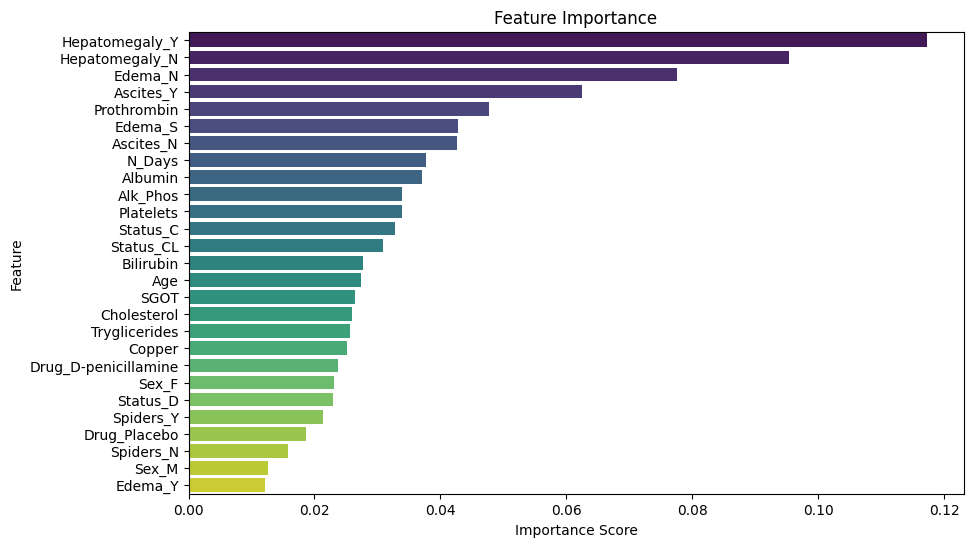

In [64]:
# Get feature importance
feature_importance = best_xgb_model.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

## Shap

In [66]:
from sklearn.inspection import PartialDependenceDisplay
from yellowbrick.regressor import prediction_error
import shap
import lime
import lime.lime_tabular 
from lime import submodular_pick
from sklearn.inspection import PartialDependenceDisplay

In [67]:
explainer = shap.TreeExplainer(best_xgb_model)

In [68]:
shap_values = explainer.shap_values(x_test)

In [69]:
shap_values[:, :, 0].shape

(5000, 27)

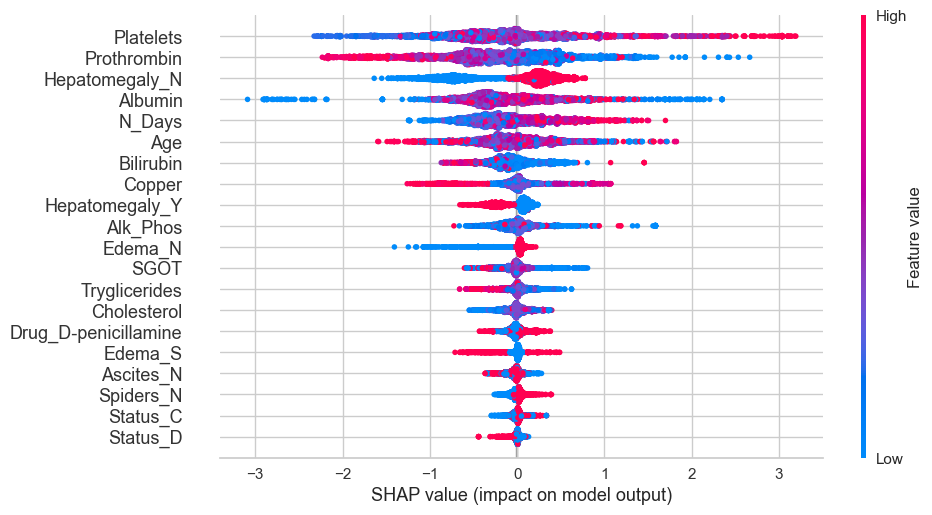

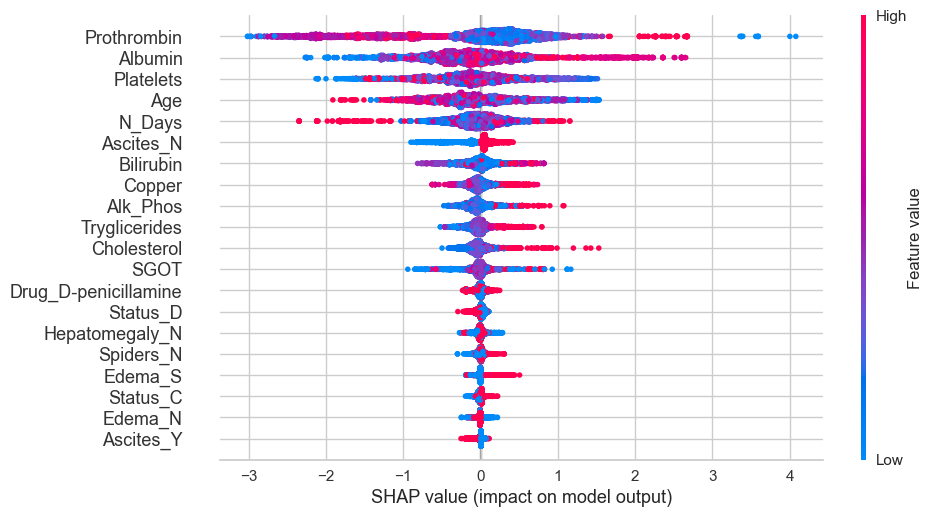

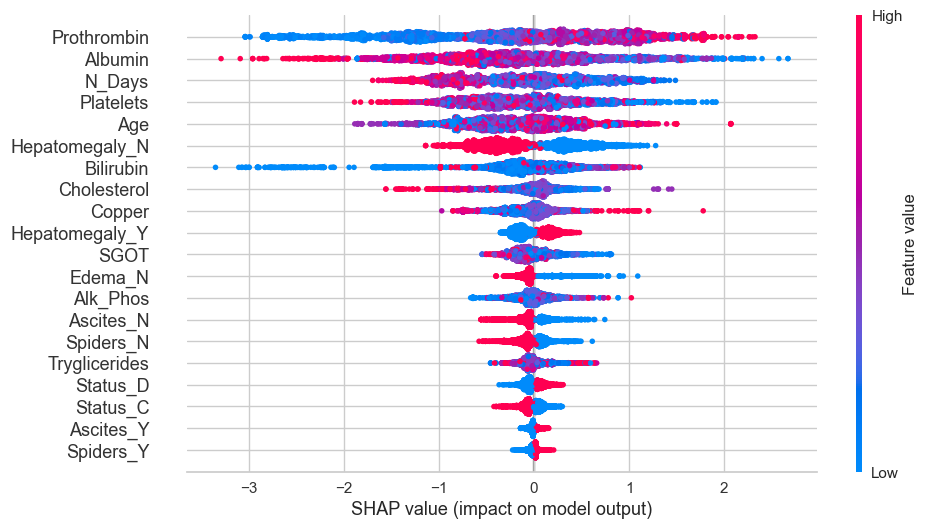

<Figure size 800x550 with 0 Axes>

In [70]:
plt.figure(figsize=(5, 15))
for idx in range(3):
    plt.subplot(3, 1, idx+1)
    shap.summary_plot(shap_values[:, :, idx], x_test, title="dfd", plot_size=(10, 15))
    plt.tight_layout()
    #plt.title("Stage : {}".format(idx+1))
plt.show()

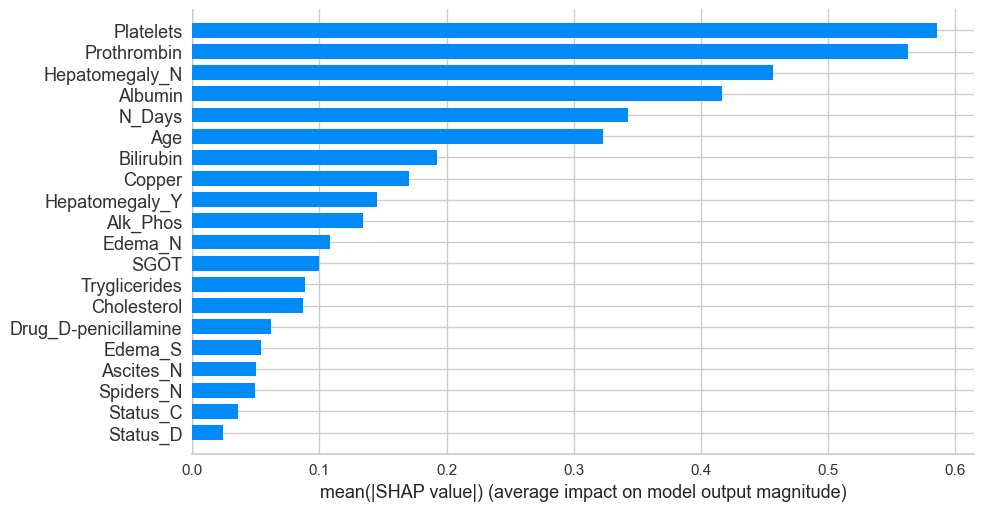

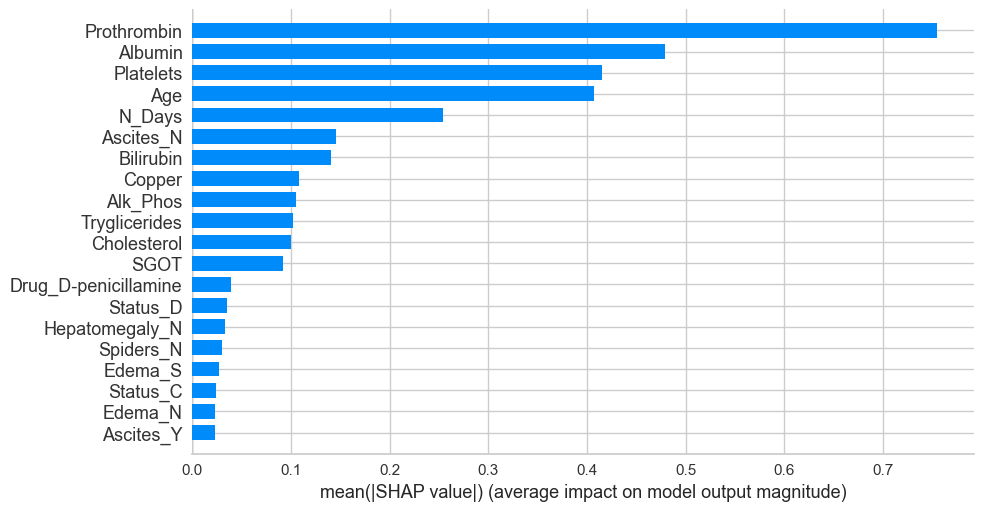

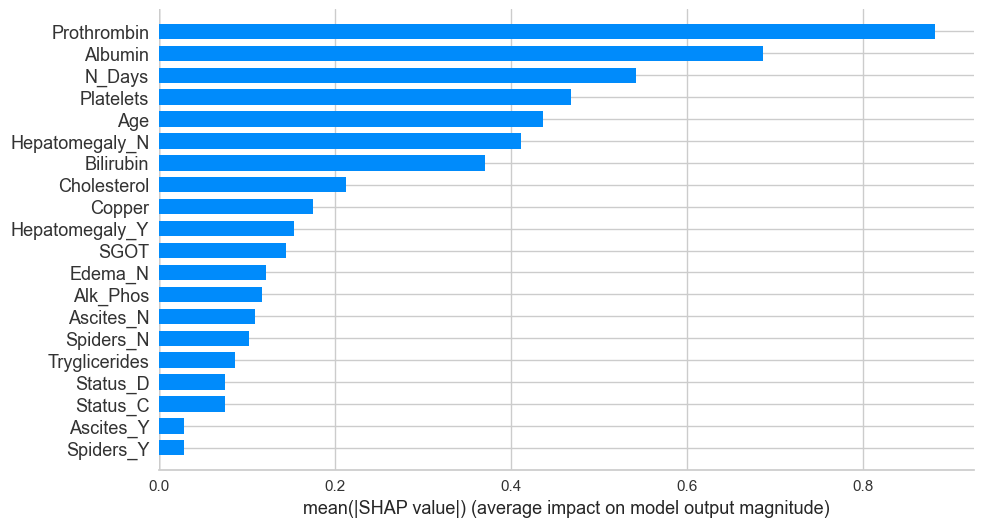

<Figure size 800x550 with 0 Axes>

In [71]:
plt.figure(figsize=(5, 15))
for idx in range(3):
    plt.subplot(3, 1, idx+1)
    shap.summary_plot(shap_values[:, :, idx], x_test, title="dfd", plot_size=(10, 15), plot_type="bar")
    plt.tight_layout()
plt.show()

## LIME

In [72]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=x_train.values, 
    feature_names=x_train.columns,
    mode='classification')

In [73]:
# observation index
i = 0

exp = explainer.explain_instance(x_test.iloc[i], best_xgb_model.predict_proba, num_features=5)
exp.show_in_notebook()

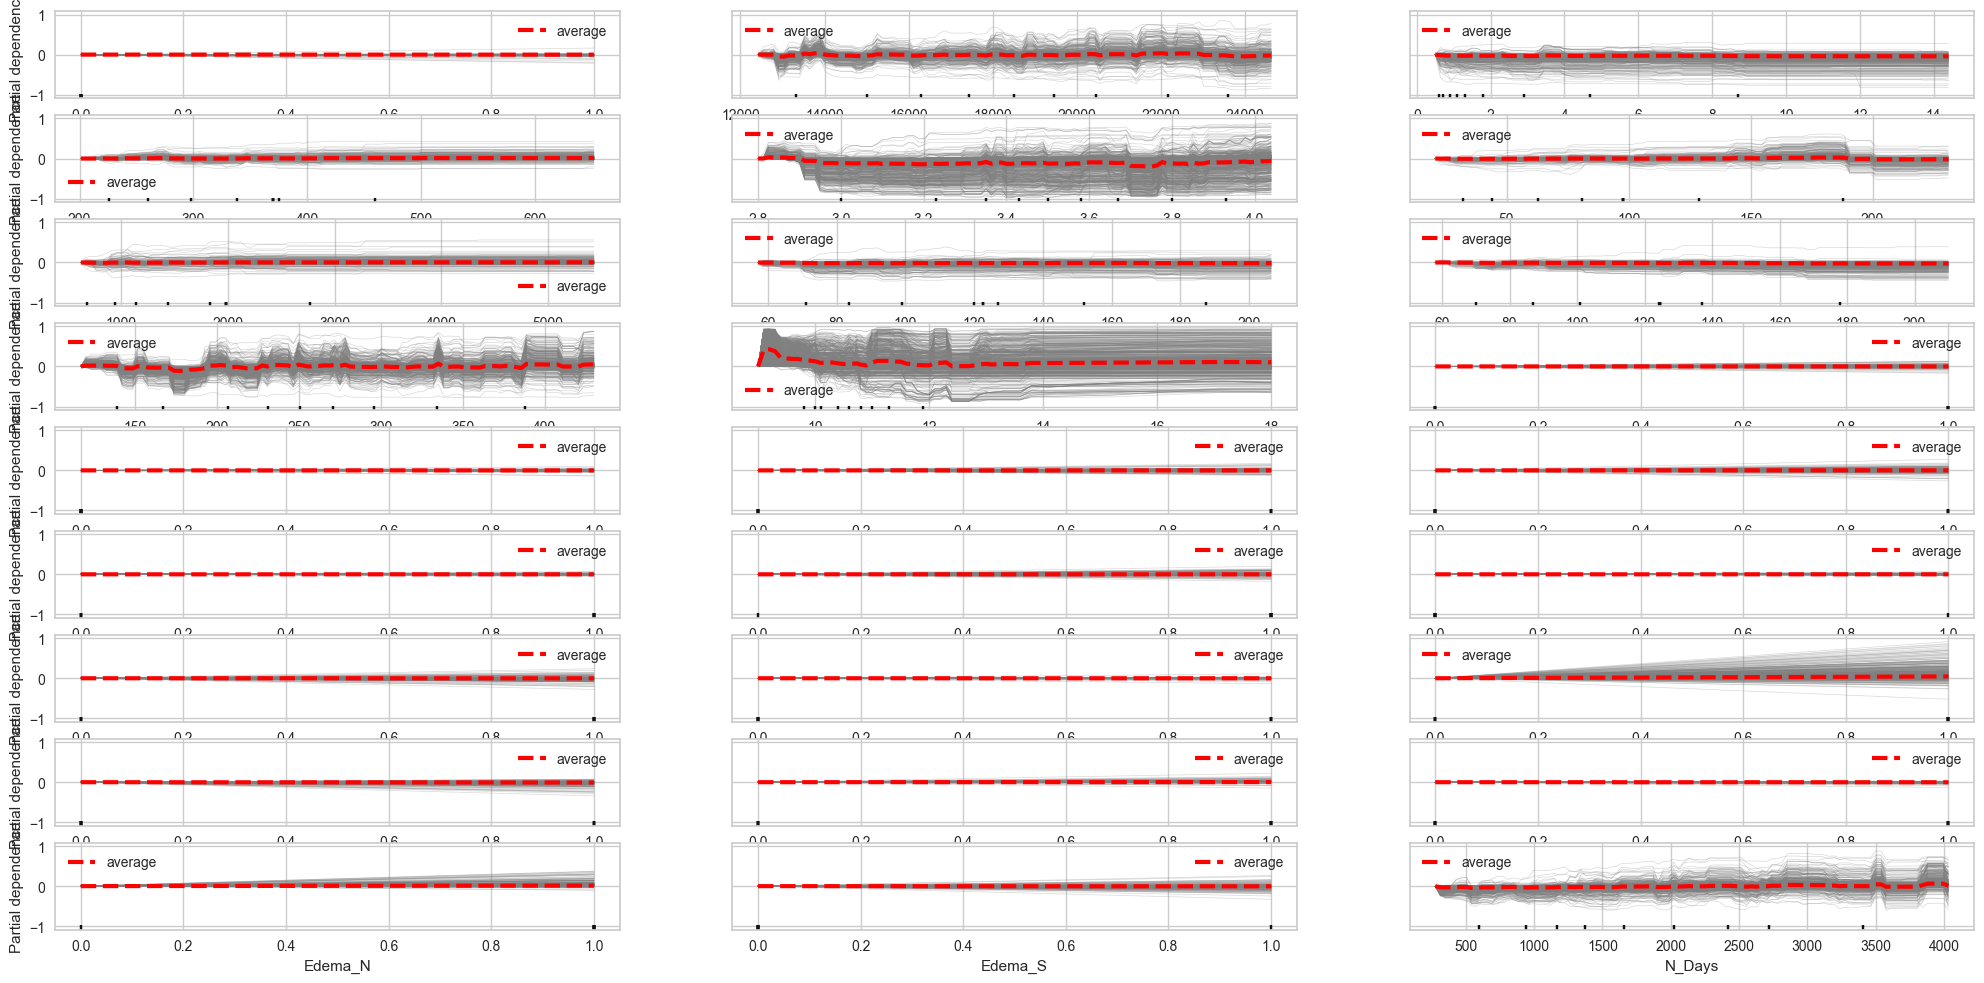

In [75]:
cols = x_test.columns
# Determine the 9 features with highest value for "feature importance" to draw the ICE plots.
included_features_indices = np.argpartition(best_xgb_model.feature_importances_, -27)[-27:]

# Plot the ICE plots.
fig, ax = plt.subplots(figsize=(20, 10))
fig.set_tight_layout(True)  # Make sure labels of axes don't overlap in the final figure.
_ = PartialDependenceDisplay.from_estimator(estimator=best_xgb_model,
                                            ax=ax,
                                            X=x_test,
                                            features=[i for i in included_features_indices],
                                            feature_names=x_train.columns,
                                            target=0,
                                            n_cols=3,
                                            centered= True,
                                            kind='both',
                                            ice_lines_kw={'color': 'gray'},
                                            pd_line_kw={'color': 'red', 'linewidth': 3, 'linestyle': 'dashed'})

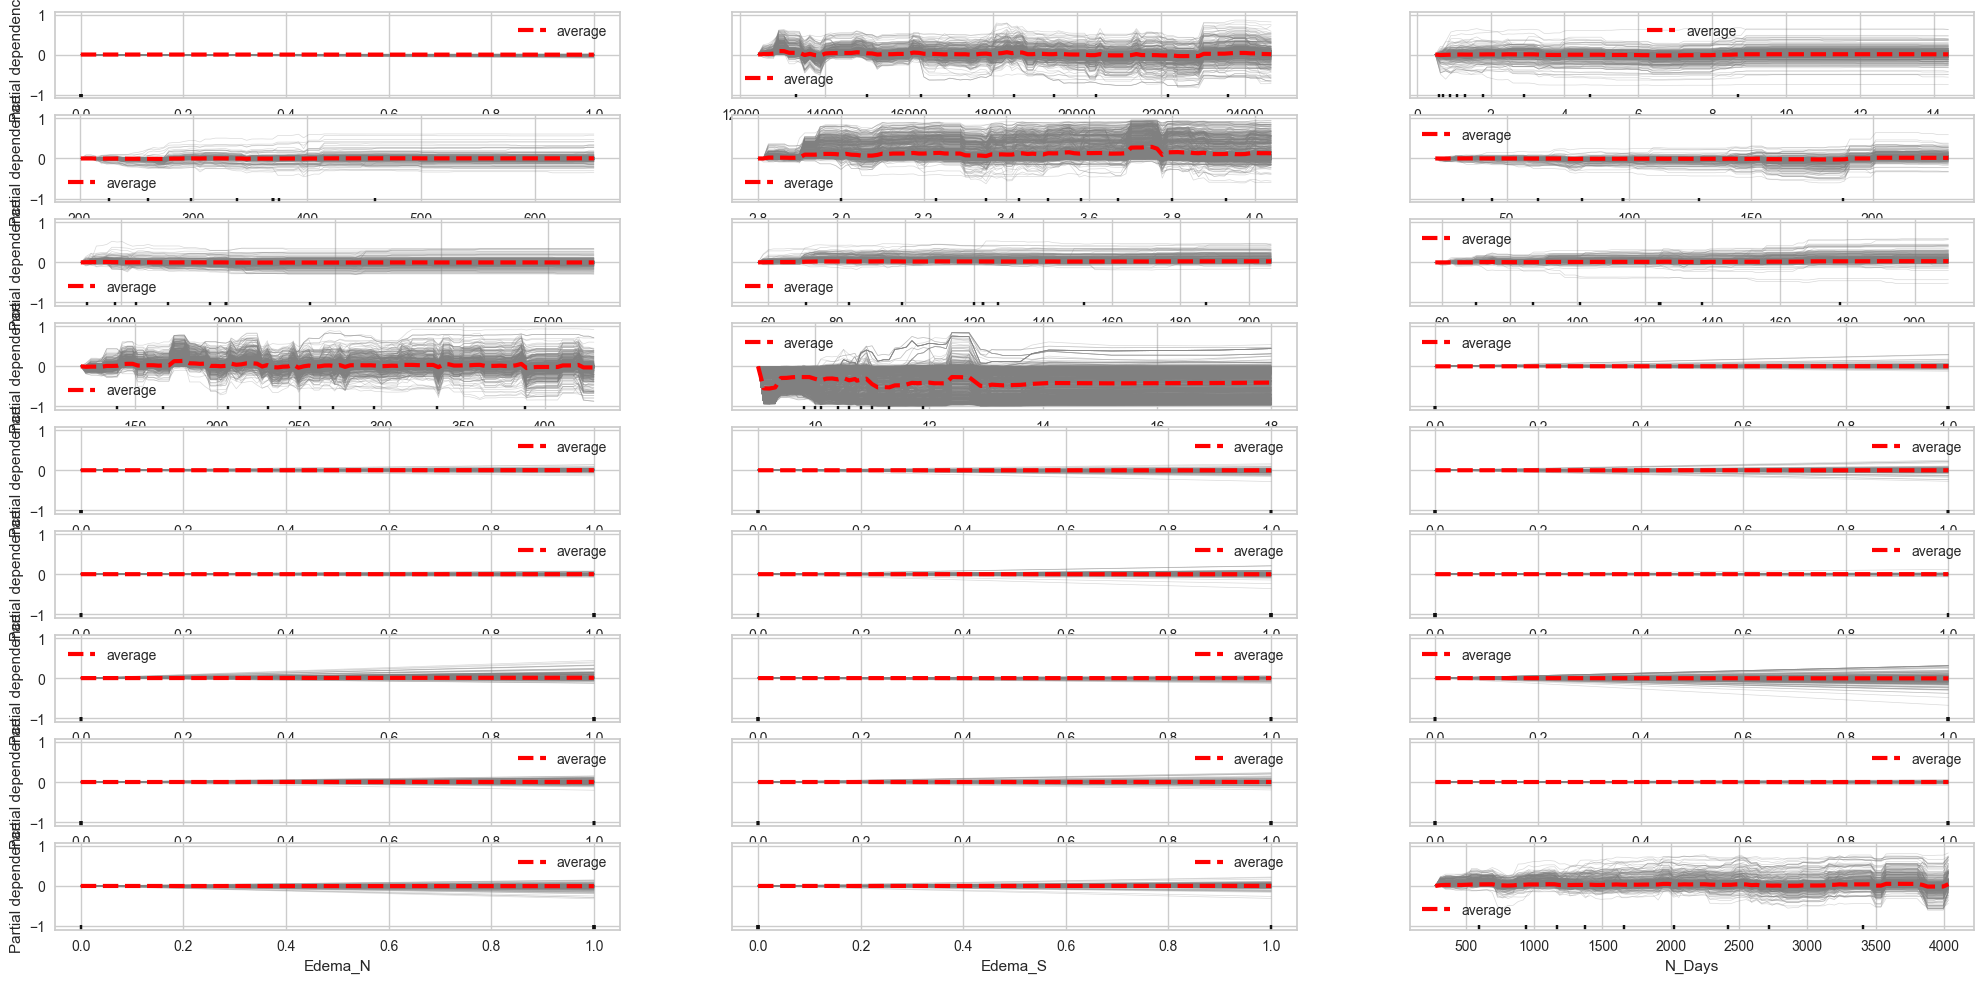

In [76]:
cols = x_test.columns
# Determine the 9 features with highest value for "feature importance" to draw the ICE plots.
included_features_indices = np.argpartition(best_xgb_model.feature_importances_, -27)[-27:]

# Plot the ICE plots.
fig, ax = plt.subplots(figsize=(20, 10))
fig.set_tight_layout(True)  # Make sure labels of axes don't overlap in the final figure.
_ = PartialDependenceDisplay.from_estimator(estimator=best_xgb_model,
                                            ax=ax,
                                            X=x_test,
                                            features=[i for i in included_features_indices],
                                            feature_names=x_train.columns,
                                            target=1,
                                            n_cols=3,
                                            centered= True,
                                            kind='both',
                                            ice_lines_kw={'color': 'gray'},
                                            pd_line_kw={'color': 'red', 'linewidth': 3, 'linestyle': 'dashed'})


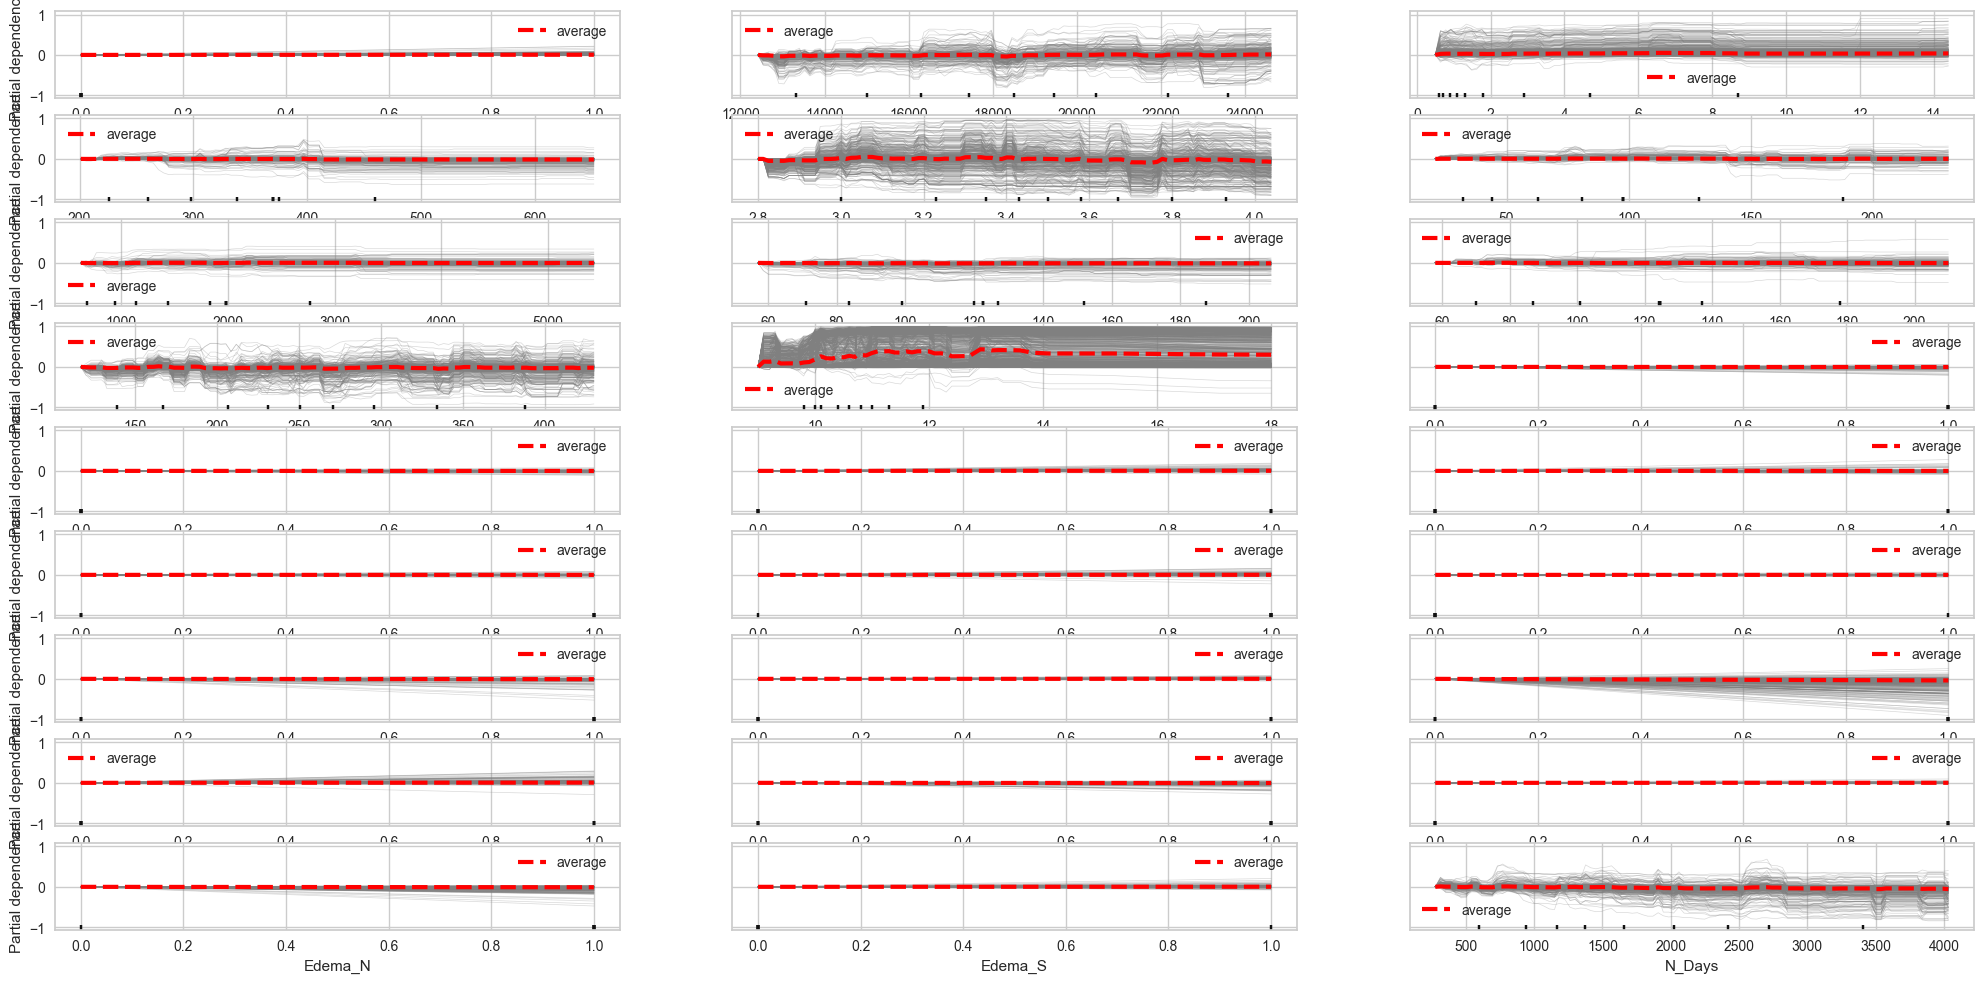

In [77]:
cols = x_test.columns
# Determine the 9 features with highest value for "feature importance" to draw the ICE plots.
included_features_indices = np.argpartition(best_xgb_model.feature_importances_, -27)[-27:]

# Plot the ICE plots.
fig, ax = plt.subplots(figsize=(20, 10))
fig.set_tight_layout(True)  # Make sure labels of axes don't overlap in the final figure.
_ = PartialDependenceDisplay.from_estimator(estimator=best_xgb_model,
                                            ax=ax,
                                            X=x_test,
                                            features=[i for i in included_features_indices],
                                            feature_names=x_train.columns,
                                            target=2,
                                            n_cols=3,
                                            centered= True,
                                            kind='both',
                                            ice_lines_kw={'color': 'gray'},
                                            pd_line_kw={'color': 'red', 'linewidth': 3, 'linestyle': 'dashed'})

In [78]:
## PDP Plots

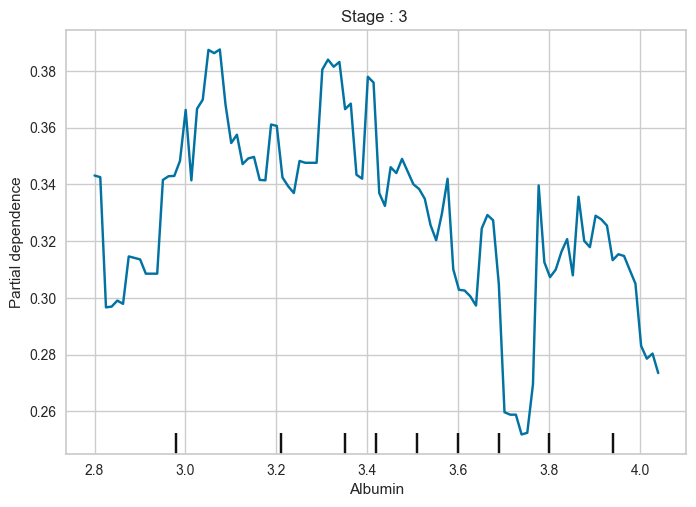

In [91]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Define the features for which you want to plot partial dependency plots
features = ['Albumin']  # Replace with the actual feature names or indices

# Specify the target class for which you want to visualize the PDP
target_class = 2 # Replace with the class index you want to visualize (e.g., 0, 1, or 2)

# Plot partial dependence for the specified target class
PartialDependenceDisplay.from_estimator(best_xgb_model, x_train, features, target=target_class)
plt.title("Stage : 3 ")
plt.show()



## CatBoost

In [92]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the CatBoost classifier
catboost_classifier = CatBoostClassifier(silent=True)

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'colsample_bylevel': [0.8, 1.0],
    'l2_leaf_reg': [1, 3, 5]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=catboost_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best model from grid search
best_catboost_model = grid_search.best_estimator_

# Make predictions on the train set
y_pred_train = best_catboost_model.predict(x_train)

# Make predictions on the test set
y_pred_test = best_catboost_model.predict(x_test)

# Evaluate the performance on the train set
train_accuracy = accuracy_score(y_train, y_pred_train)
train_conf_matrix = confusion_matrix(y_train, y_pred_train)

# Evaluate the performance on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
test_conf_matrix = confusion_matrix(y_test, y_pred_test)
classification_report_result = classification_report(y_test, y_pred_test)

# Print the results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report (Test Set):")
print(classification_report_result)

print("\nConfusion Matrix (Train Set):")
print(train_conf_matrix)

print("\nConfusion Matrix (Test Set):")
print(test_conf_matrix)


Train Accuracy: 0.9760
Test Accuracy: 0.9518

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1592
           1       0.94      0.95      0.95      1710
           2       0.97      0.97      0.97      1698

    accuracy                           0.95      5000
   macro avg       0.95      0.95      0.95      5000
weighted avg       0.95      0.95      0.95      5000


Confusion Matrix (Train Set):
[[6474  147   52]
 [ 117 6551   63]
 [  37   64 6495]]

Confusion Matrix (Test Set):
[[1493   67   32]
 [  58 1627   25]
 [  20   39 1639]]


## AdaBoost

In [93]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the AdaBoost classifier with a DecisionTreeClassifier as the base estimator
adaboost_classifier = AdaBoostClassifier(estimator=DecisionTreeClassifier())

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'estimator__max_depth': [1, 2, 3],  # Parameters for the base estimator (DecisionTreeClassifier)
    'estimator__min_samples_split': [2, 5, 10],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=adaboost_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best model from grid search
best_adaboost_model = grid_search.best_estimator_

# Make predictions on the train set
y_pred_train = best_adaboost_model.predict(x_train)

# Make predictions on the test set
y_pred_test = best_adaboost_model.predict(x_test)

# Evaluate the performance on the train set
train_accuracy = accuracy_score(y_train, y_pred_train)
train_conf_matrix = confusion_matrix(y_train, y_pred_train)

# Evaluate the performance on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
test_conf_matrix = confusion_matrix(y_test, y_pred_test)
classification_report_result = classification_report(y_test, y_pred_test)

# Print the results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report (Test Set):")
print(classification_report_result)

print("\nConfusion Matrix (Train Set):")
print(train_conf_matrix)

print("\nConfusion Matrix (Test Set):")
print(test_conf_matrix)


Train Accuracy: 0.9274
Test Accuracy: 0.9102

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1592
           1       0.88      0.90      0.89      1710
           2       0.94      0.93      0.94      1698

    accuracy                           0.91      5000
   macro avg       0.91      0.91      0.91      5000
weighted avg       0.91      0.91      0.91      5000


Confusion Matrix (Train Set):
[[6177  432   64]
 [ 320 6097  314]
 [  79  243 6274]]

Confusion Matrix (Test Set):
[[1426  143   23]
 [  92 1539   79]
 [  36   76 1586]]


## DecisionTreeClassifier

In [98]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the base classifier (DecisionTreeClassifier in this example)
base_classifier = DecisionTreeClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [10, 20, 30],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

# Create BaggingClassifier
bagging_classifier = BaggingClassifier(base_classifier)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=bagging_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best model from grid search
best_bagging_model = grid_search.best_estimator_

# Make predictions on the train set
y_pred_train = best_bagging_model.predict(x_train)

# Make predictions on the test set
y_pred_test = best_bagging_model.predict(x_test)

# Evaluate the performance on the train set
train_accuracy = accuracy_score(y_train, y_pred_train)
train_conf_matrix = confusion_matrix(y_train, y_pred_train)

# Evaluate the performance on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
test_conf_matrix = confusion_matrix(y_test, y_pred_test)
classification_report_result = classification_report(y_test, y_pred_test)

# Print the results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report (Test Set):")
print(classification_report_result)

print("\nConfusion Matrix (Train Set):")
print(train_conf_matrix)

print("\nConfusion Matrix (Test Set):")
print(test_conf_matrix)


Train Accuracy: 0.9919
Test Accuracy: 0.9526

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1592
           1       0.94      0.95      0.94      1710
           2       0.97      0.97      0.97      1698

    accuracy                           0.95      5000
   macro avg       0.95      0.95      0.95      5000
weighted avg       0.95      0.95      0.95      5000


Confusion Matrix (Train Set):
[[6602   58   13]
 [  49 6665   17]
 [   4   20 6572]]

Confusion Matrix (Test Set):
[[1489   78   25]
 [  57 1624   29]
 [  15   33 1650]]


## SVM Classifier

In [94]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the SVM classifier with probability estimates enabled
svm_classifier = SVC(probability=True)

# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get the best model from grid search
best_svm_model = grid_search.best_estimator_

# Make predictions on the train set
y_pred_train = best_svm_model.predict(x_train)

# Make predictions on the test set
y_pred_test = best_svm_model.predict(x_test)

# Evaluate the performance on the train set
train_accuracy = accuracy_score(y_train, y_pred_train)
train_conf_matrix = confusion_matrix(y_train, y_pred_train)

# Evaluate the performance on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
test_conf_matrix = confusion_matrix(y_test, y_pred_test)
classification_report_result = classification_report(y_test, y_pred_test)

# Print the results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report (Test Set):\n", classification_report_result)

print("\nConfusion Matrix (Train Set):\n", train_conf_matrix)
print("\nConfusion Matrix (Test Set):\n", test_conf_matrix)


Train Accuracy: 0.9936
Test Accuracy: 0.8178

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.98      0.74      0.84      1592
           1       0.66      0.99      0.79      1710
           2       1.00      0.72      0.84      1698

    accuracy                           0.82      5000
   macro avg       0.88      0.82      0.82      5000
weighted avg       0.88      0.82      0.82      5000


Confusion Matrix (Train Set):
 [[6609   54   10]
 [  38 6683   10]
 [   0   16 6580]]

Confusion Matrix (Test Set):
 [[1172  419    1]
 [  17 1690    3]
 [   1  470 1227]]


## RandomForestClassifier

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best model from grid search
best_rf_model = grid_search.best_estimator_

# Make predictions on the train set
y_pred_train = best_rf_model.predict(x_train)

# Make predictions on the test set
y_pred_test = best_rf_model.predict(x_test)

# Evaluate the performance on the train set
train_accuracy = accuracy_score(y_train, y_pred_train)
train_conf_matrix = confusion_matrix(y_train, y_pred_train)

# Evaluate the performance on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
test_conf_matrix = confusion_matrix(y_test, y_pred_test)
classification_report_result = classification_report(y_test, y_pred_test)

# Print the results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report (Test Set):\n", classification_report_result)

print("\nConfusion Matrix (Train Set):\n", train_conf_matrix)
print("\nConfusion Matrix (Test Set):\n", test_conf_matrix)


Train Accuracy: 0.9938
Test Accuracy: 0.9536

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.95      0.94      0.95      1592
           1       0.94      0.95      0.94      1710
           2       0.97      0.97      0.97      1698

    accuracy                           0.95      5000
   macro avg       0.95      0.95      0.95      5000
weighted avg       0.95      0.95      0.95      5000


Confusion Matrix (Train Set):
 [[6611   53    9]
 [  39 6681   11]
 [   1   12 6583]]

Confusion Matrix (Test Set):
 [[1496   73   23]
 [  58 1624   28]
 [  17   33 1648]]


In [100]:
# Print the best parameters selected by GridSearchCV
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


## Multinomial Logistic

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the multiclass logistic regression model
logreg_classifier = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l2']  # Only L2 regularization is supported for multinomial logistic regression
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=logreg_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best model from grid search
best_logreg_model = grid_search.best_estimator_

# Make predictions on the train set
y_pred_train = best_logreg_model.predict(x_train)

# Make predictions on the test set
y_pred_test = best_logreg_model.predict(x_test)

# Evaluate the performance on the train set
train_accuracy = accuracy_score(y_train, y_pred_train)
train_conf_matrix = confusion_matrix(y_train, y_pred_train)

# Evaluate the performance on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
test_conf_matrix = confusion_matrix(y_test, y_pred_test)
classification_report_result = classification_report(y_test, y_pred_test)

# Print the results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report (Test Set):\n", classification_report_result)

print("\nConfusion Matrix (Train Set):\n", train_conf_matrix)
print("\nConfusion Matrix (Test Set):\n", test_conf_matrix)


Train Accuracy: 0.4974
Test Accuracy: 0.4914

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.47      0.61      0.53      1592
           1       0.48      0.28      0.35      1710
           2       0.52      0.60      0.55      1698

    accuracy                           0.49      5000
   macro avg       0.49      0.49      0.48      5000
weighted avg       0.49      0.49      0.48      5000


Confusion Matrix (Train Set):
 [[3975 1168 1530]
 [2588 1799 2344]
 [1397 1025 4174]]

Confusion Matrix (Test Set):
 [[ 964  244  384]
 [ 669  477  564]
 [ 402  280 1016]]


## Bagging Classifier

In [101]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the base estimator
base_estimator = DecisionTreeClassifier()

# Define the Bagging classifier with the base estimator
bagging_classifier = BaggingClassifier(estimator=base_estimator, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of base estimators
    'max_samples': [0.8, 1.0],       # Number of samples to draw from X to train each base estimator
    'max_features': [0.8, 1.0],      # Number of features to draw from X to train each base estimator
    'estimator__max_depth': [3, 5, 7]  # Depth of the base estimator trees
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=bagging_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best model from grid search
best_bagging_model = grid_search.best_estimator_

# Make predictions on the train set
y_pred_train = best_bagging_model.predict(x_train)

# Make predictions on the test set
y_pred_test = best_bagging_model.predict(x_test)

# Evaluate the performance on the train set
train_accuracy = accuracy_score(y_train, y_pred_train)
train_conf_matrix = confusion_matrix(y_train, y_pred_train)

# Evaluate the performance on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
test_conf_matrix = confusion_matrix(y_test, y_pred_test)
classification_report_result = classification_report(y_test, y_pred_test)

# Print the results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report (Test Set):")
print(classification_report_result)

print("\nConfusion Matrix (Train Set):")
print(train_conf_matrix)

print("\nConfusion Matrix (Test Set):")
print(test_conf_matrix)


Train Accuracy: 0.8679
Test Accuracy: 0.8496

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1592
           1       0.78      0.87      0.82      1710
           2       0.91      0.83      0.87      1698

    accuracy                           0.85      5000
   macro avg       0.86      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000


Confusion Matrix (Train Set):
[[5706  811  156]
 [ 374 6005  352]
 [ 229  721 5646]]

Confusion Matrix (Test Set):
[[1346  207   39]
 [ 114 1496  100]
 [  72  220 1406]]


In [102]:
# Print the best parameters selected by GridSearchCV
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

Best Parameters: {'estimator__max_depth': 7, 'max_features': 0.8, 'max_samples': 0.8, 'n_estimators': 200}
